User - Rating model
Merchants are same as movies - if customer bought from that merchant - give rating based on number of times (purchase from merchant /total purchases )
Use customer features 1,2,3 and target  
use merchant ratings for that customer
use historical transactions to extract features about merchant rating given by the customer (based on type of customer, first active month, feature 1,2,3
Card_id is not a feature

Categorize merchants by merchant_group_id	merchant_category_id	subsector_id,city,state

Test set do not have merchant feature, so target for customer would be 
1) average of all merchants
2) sum of all merchants
3) sum of top 10 merchants 
4) average of top 10 merchants

Use regression model
Add features to train set from transactions
    a) 'merchant_group_id','state_id','city_id' for the given card id

In [1]:
from fastai.learner import *
from fastai.column_data import *
from fastai.structured import *

In [2]:
PATH=Path('../data/elo')

In [3]:
customer = pd.read_csv(PATH/'train.csv')
customer_test = pd.read_csv(PATH/'test.csv')

In [4]:
# customer.head()
len(customer)

201917

In [4]:
# customer_id = customer.groupby(['first_active_month','feature_1','feature_2','feature_3'],as_index=False).count().reset_index()

In [5]:
# customer_test_id = customer_test.groupby(['first_active_month','feature_1','feature_2','feature_3'],as_index=False).count().reset_index()

In [6]:
# customer_id = customer_id.drop(['card_id','target'],axis=1)

In [5]:
# len(customer_id)
# customer_id.head()

In [6]:
customer_test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04,C_ID_0ab67a22ab,3,3,1
1,2017-01,C_ID_130fd0cbdd,2,3,0
2,2017-08,C_ID_b709037bc5,5,1,1
3,2017-12,C_ID_d27d835a9f,2,1,0
4,2015-12,C_ID_2b5e3df5c2,5,1,1


In [224]:
# customer_test_id = customer_test_id[['index','first_active_month','feature_1','feature_2','feature_3']].copy()
# len(customer_test_id)

In [102]:
# check = pd.merge(customer_id, customer_test_id,how='outer',on=['first_active_month','feature_1','feature_2','feature_3'])

In [103]:
# merchants =  pd.read_csv(PATH/'merchants.csv')

In [104]:
# merchant_id = merchants.groupby(['merchant_group_id','state_id','city_id'],as_index=False).count().reset_index()

In [105]:
# merchant_id = merchant_id[['index','merchant_group_id','merchant_category_id','subsector_id','city_id','state_id']].copy()
# merchant_id = merchant_id[['index','merchant_group_id','state_id','city_id']].copy()

In [106]:
# new_merchants =  pd.read_csv(PATH/'new_merchant_transactions.csv')
# merchants.head()

In [7]:
transactions= pd.read_csv(PATH/'historical_transactions.csv')
#                           ,nrows=100000)
transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [10]:
# take only merchant fields
# transactions = transactions[['card_id','merchant_category_id','state_id','city_id','purchase_amount','purchase_date']].copy()
transactions1 = transactions[['card_id','purchase_amount']].copy()

In [11]:
transactions = None
# transactions[transactions[''] > 0]['merchant_id'].count()

In [12]:
#merge merchants into training set
customer = pd.merge(customer,transactions1, on='card_id', how='left')
customer.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,purchase_amount
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,-0.506033
1,2017-06,C_ID_92a2005557,5,2,1,-0.820283,-0.722114
2,2017-06,C_ID_92a2005557,5,2,1,-0.820283,-0.726171
3,2017-06,C_ID_92a2005557,5,2,1,-0.820283,-0.610167
4,2017-06,C_ID_92a2005557,5,2,1,-0.820283,-0.307232


In [13]:
customer['purchase_amount'] = customer['purchase_amount'].fillna(0.0)

In [14]:
len(customer[customer['purchase_amount'] ==0])

6

In [15]:
customer.to_feather(f'{PATH}customer')

In [16]:
customer_test.to_feather(f'{PATH}customer_test')

In [3]:
customer = pd.read_feather(f'{PATH}customer')

In [4]:
customer_test = pd.read_feather(f'{PATH}customer_test')

In [6]:
customer_test = pd.merge(customer_test,customer, how='left',on=['first_active_month','feature_1','feature_2','feature_3'])

TypeError: merge() got an unexpected keyword argument 'inplace'

In [15]:
customer_test_id.head()

,first_active_month,card_id_x,feature_1,feature_2,feature_3,card_id_y,target,purchase_amount
0,2017-04,C_ID_0ab67a22ab,3,3,1,C_ID_28629faf1c,-0.170939,0.0
1,2017-04,C_ID_0ab67a22ab,3,3,1,C_ID_fc3aad0d44,4.484370,0.0
2,2017-04,C_ID_0ab67a22ab,3,3,1,C_ID_51370da759,1.142609,0.0
3,2017-04,C_ID_0ab67a22ab,3,3,1,C_ID_3c7fa72a88,1.463612,0.0
4,2017-04,C_ID_0ab67a22ab,3,3,1,C_ID_56f71771c0,2.393137,0.0


In [17]:
customer_test_id = customer_test_id.drop(['card_id_x','target'],axis=1,inplace=True)

MemoryError: 

In [169]:
#merge merchants into test set
customer_test = pd.merge(customer_test,transactions ,how='left',on='card_id')
customer_test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,merchant_category_id,state_id,city_id,purchase_amount,purchase_date
0,2017-04,C_ID_0ab67a22ab,3,3,1,NaN,NaN,NaN,NaN,NaN
1,2017-01,C_ID_130fd0cbdd,2,3,0,NaN,NaN,NaN,NaN,NaN
2,2017-08,C_ID_b709037bc5,5,1,1,NaN,NaN,NaN,NaN,NaN
3,2017-12,C_ID_d27d835a9f,2,1,0,NaN,NaN,NaN,NaN,NaN
4,2015-12,C_ID_2b5e3df5c2,5,1,1,NaN,NaN,NaN,NaN,NaN


In [170]:
def NumericalColumns(df):    # fillna numeric feature
    df['merchant_category_id'].fillna(0, inplace=True) #filling NA's with 1
    df['state_id'].fillna(0, inplace=True) #filling NA's with 0
    df['city_id'].fillna(0, inplace=True) #filling NA's with 0
    df['purchase_amount'].fillna(0, inplace=True)   #filling NA's with 0
    df['purchase_date'].fillna(df['first_active_month']+'-01 00:00:00', inplace=True) # filling boolean with False
    return df

In [171]:
from datetime import datetime

# This function is to extract date features
def date_process(df):
    df["purchase_date"] = pd.to_datetime(df["purchase_date"], infer_datetime_format=True) # setting the column as pandas datetime
    df["_weekday"] = df['purchase_date'].dt.weekday #extracting week day
    df["_day"] = df['purchase_date'].dt.day # extracting day
    df["_month"] = df['purchase_date'].dt.month # extracting day
    df["_year"] = df['purchase_date'].dt.year # extracting day
    return df #returning the df after the transformations

In [172]:
from sklearn import preprocessing

def Normalizing(df):
    df['purchase_amount'] = df['purchase_amount'].apply(lambda x: np.log1p(x))
    return df 

In [173]:
customer = NumericalColumns(customer)
customer_test = NumericalColumns(customer_test)

In [174]:
customer_test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,merchant_category_id,state_id,city_id,purchase_amount,purchase_date
0,2017-04,C_ID_0ab67a22ab,3,3,1,0.0,0.0,0.0,0.0,2017-04-01 00:00:00
1,2017-01,C_ID_130fd0cbdd,2,3,0,0.0,0.0,0.0,0.0,2017-01-01 00:00:00
2,2017-08,C_ID_b709037bc5,5,1,1,0.0,0.0,0.0,0.0,2017-08-01 00:00:00
3,2017-12,C_ID_d27d835a9f,2,1,0,0.0,0.0,0.0,0.0,2017-12-01 00:00:00
4,2015-12,C_ID_2b5e3df5c2,5,1,1,0.0,0.0,0.0,0.0,2015-12-01 00:00:00


In [181]:
customer = date_process(customer)
customer_test = date_process(customer_test)



In [182]:
customer_test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,merchant_category_id,state_id,city_id,purchase_amount,purchase_date,_weekday,_day,_month,_year
0,2017-04,C_ID_0ab67a22ab,3,3,1,0.0,0.0,0.0,0.0,2017-04-01,5.0,1.0,4.0,2017.0
1,2017-01,C_ID_130fd0cbdd,2,3,0,0.0,0.0,0.0,0.0,2017-01-01,6.0,1.0,1.0,2017.0
2,2017-08,C_ID_b709037bc5,5,1,1,0.0,0.0,0.0,0.0,2017-08-01,1.0,1.0,8.0,2017.0
3,2017-12,C_ID_d27d835a9f,2,1,0,0.0,0.0,0.0,0.0,2017-12-01,4.0,1.0,12.0,2017.0
4,2015-12,C_ID_2b5e3df5c2,5,1,1,0.0,0.0,0.0,0.0,2015-12-01,1.0,1.0,12.0,2015.0


In [177]:
customer = Normalizing(customer)
customer_test = Normalizing(customer_test)

In [179]:
cat_vars = ['feature_1','feature_2','feature_3','merchant_category_id','state_id','city_id','first_active_month',
           '_weekday','_day','_month','_year']
contin_vars = ['purchase_amount']

In [183]:
dep = 'target'
df_train = customer[cat_vars+contin_vars+[dep, 'purchase_date']].copy()

In [184]:
customer_test[dep] = 0.0
df_test = customer_test[cat_vars+contin_vars+[dep, 'purchase_date', 'card_id']].copy()

In [185]:
for v in cat_vars: df_train[v] = df_train[v].astype('category').cat.as_ordered()
apply_cats(df_test, df_train)

In [186]:
for v in contin_vars:
    df_train[v] = df_train[v].fillna(0).astype('float32')
    df_test[v] = df_test[v].fillna(0).astype('float32')

In [187]:
samp_size = len(df_train)
df_samp = df_train.set_index("purchase_date")

In [188]:
df, y, nas, mapper = proc_df(df_samp, dep, do_scale=True)

In [189]:
df_test = df_test.set_index("purchase_date")

In [190]:
df_test1, _, nas, mapper = proc_df(df_test, dep, do_scale=True,skip_flds=['card_id'],mapper=mapper, na_dict=nas)

In [191]:
train_ratio = 0.75
# train_ratio = 0.9
train_size = int(samp_size * train_ratio); train_size
val_idx = list(range(train_size, len(df)))

In [192]:
# def inv_y(a): return np.exp(a)

def exp_rmse(y_pred, targ):
#     targ = inv_y(targ)
    pct_var = (targ - y_pred)
    return math.sqrt((pct_var**2).mean())

y_range = (0, 1)

In [193]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, y.astype(np.float32), cat_flds=cat_vars, bs=128,
                                       test_df=df_test1)

In [194]:
cat_sz = [(c, len(df_samp[c].cat.categories)+1) for c in cat_vars]
cat_sz

[('feature_1', 6),
 ('feature_2', 4),
 ('feature_3', 3),
 ('merchant_category_id', 244),
 ('state_id', 27),
 ('city_id', 271),
 ('first_active_month', 76),
 ('_weekday', 8),
 ('_day', 32),
 ('_month', 13),
 ('_year', 9)]

In [195]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]
emb_szs

[(6, 3),
 (4, 2),
 (3, 2),
 (244, 50),
 (27, 14),
 (271, 50),
 (76, 38),
 (8, 4),
 (32, 16),
 (13, 7),
 (9, 5)]

In [196]:
df_test1.head()

,feature_1,feature_2,feature_3,merchant_category_id,state_id,city_id,first_active_month,_weekday,_day,_month,_year,purchase_amount
purchase_date,,,,,,,,,,,,
2017-04-01,3,3,2,2,2,2,65,6,1,4,7,0.525223
2017-01-01,2,3,1,2,2,2,62,7,1,1,7,0.525223
2017-08-01,5,1,2,2,2,2,69,2,1,8,7,0.525223
2017-12-01,2,1,1,2,2,2,73,5,1,12,7,0.525223
2015-12-01,5,1,2,2,2,2,49,2,1,12,5,0.525223


In [70]:
m = md.get_learner(emb_szs,len(df.columns)-len(cat_vars),0.04,1,[1000,500],[0.001,0.01])

 63%|█████████████████▌          | 983/1564 [00:26<00:15, 36.86it/s, loss=43.6]

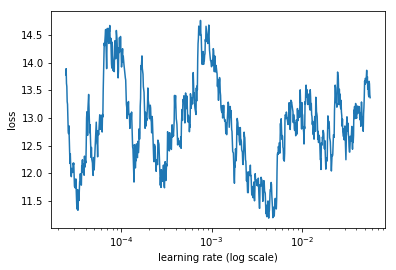

In [71]:
lr=1e-3
m.lr_find()
m.sched.plot(100)

In [72]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-3

 63%|█████████████████▌          | 983/1564 [00:40<00:23, 24.56it/s, loss=43.6]

In [76]:
m.fit(lr, 3, metrics=[exp_rmse])

epoch      trn_loss   val_loss   exp_rmse                                      
    0      14.48891   19.237099  3.556571  
    1      13.535294  19.237348  3.557411                                      
    2      13.889003  19.239436  3.557849                                      


[array([19.23944]), 3.5578490539895937]

In [77]:
x,y=m.predict_with_targs()

In [78]:
exp_rmse(x,y)

4.386278274718954

In [79]:
pred_test=m.predict(True)
pred_test = np.exp(pred_test)

In [80]:
df_test[dep]=pred_test

In [159]:
csv_fn=f'{PATH}/tmp/elo-subv3.csv'

In [132]:
df_uniq = df_test.groupby('card_id').mean().reset_index()

In [133]:
df_uniq.head()

,card_id,purchase_amount,target
0,C_ID_0001238066,0.0,0.475545
1,C_ID_0001793786,0.0,0.441442
2,C_ID_00024e244b,0.0,0.468136
3,C_ID_0002709b5a,0.0,0.430003
4,C_ID_000298032a,0.0,0.478113


In [82]:
df_test[['card_id',dep]].to_csv(csv_fn, index=False)

In [134]:
df_uniq[['card_id',dep]].to_csv(csv_fn, index=False)

In [128]:
import lightgbm as lgb
((val, trn), (y_val, y_trn)) = split_by_idx(val_idx, df.values, y)
lgb_train = lgb.Dataset(trn, y_trn)
lgb_val = lgb.Dataset(val, y_val)

In [93]:
len(df.values)

266811

In [129]:
  params = {
        'objective': 'binary',
        'boosting': 'gbdt',
        'learning_rate': 0.2,
        'verbose': 0,
        'num_leaves': 100,
        'bagging_fraction': 0.95,
        'bagging_freq': 1,
        'bagging_seed': 1,
        'feature_fraction': 0.9,
        'feature_fraction_seed': 1,
        'max_bin': 256,
        'num_rounds': 100,
        'metric': 'auc'
    }

In [130]:
lgbm_model = lgb.train(params, train_set=lgb_train, valid_sets=lgb_val, verbose_eval=5)
predictions = lgbm_model.predict(df_test1)
df_test[dep] =predictions

C:\ProgramData\Anaconda3\envs\fastai-cpu\lib\site-packages\lightgbm\engine.py:116: UserWarning: Found `num_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[5]	valid_0's auc: 0.531714
[10]	valid_0's auc: 0.530657
[15]	valid_0's auc: 0.532624
[20]	valid_0's auc: 0.535716
[25]	valid_0's auc: 0.532253
[30]	valid_0's auc: 0.539877
[35]	valid_0's auc: 0.539718
[40]	valid_0's auc: 0.541244
[45]	valid_0's auc: 0.54127
[50]	valid_0's auc: 0.538808
[55]	valid_0's auc: 0.538983
[60]	valid_0's auc: 0.53751
[65]	valid_0's auc: 0.535022
[70]	valid_0's auc: 0.534924
[75]	valid_0's auc: 0.532518
[80]	valid_0's auc: 0.533342
[85]	valid_0's auc: 0.532201
[90]	valid_0's auc: 0.532897
[95]	valid_0's auc: 0.531708
[100]	valid_0's auc: 0.531839


#Random Forest

In [135]:
from sklearn.ensemble import RandomForestRegressor

In [136]:
((val, trn), (y_val, y_trn)) = split_by_idx(val_idx, df.values, y)

In [137]:
m = RandomForestRegressor(n_estimators=40, max_features=0.99, min_samples_leaf=2,
                               n_jobs=-1, oob_score=True)

In [138]:
m.fit(trn, y_trn)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.99, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [152]:
val.shape

(66703, 12)

In [151]:
len(val)

66703

In [153]:
preds = m.predict(df_test1.values)

In [154]:
len(preds)

158266

In [155]:
len(df_test)

158266

In [156]:
df_test[dep] = preds

In [157]:
df_uniq1 = df_test.groupby('card_id').count().reset_index()

In [158]:
len(df_uniq1)

123623

,card_id,feature_1,feature_2,feature_3,merchant_category_id,state_id,city_id,first_active_month,_weekday,_day,_month,_year,purchase_amount,target
0,C_ID_0001238066,1,1,1,1,1,1,1,1,1,1,1,1,1
1,C_ID_0001793786,1,1,1,1,1,1,1,1,1,1,1,1,1
2,C_ID_00024e244b,1,1,1,1,1,1,1,1,1,1,1,1,1
3,C_ID_0002709b5a,1,1,1,1,1,1,1,1,1,1,1,1,1
4,C_ID_000298032a,1,1,1,1,1,1,1,1,1,1,1,1,1


In [160]:
df_uniq1[['card_id',dep]].to_csv(csv_fn, index=False)